In [2]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

In [3]:
# Load and define our data.
df = pd.read_csv('customers.csv')

In [4]:
df.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [7]:
# Looking at the data we can see that there are several missing values in columns that are numbers and categories. We will fill the missing values with the mean and mode before moving on.

## DATA CLEANING__________________________________________________________________________________________________________

In [8]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Define categorical and numerical columns
categorical_columns = ["Ever_Married", "Graduated", "Profession", "Var_1"]
numerical_columns = ["Age", "Family_Size", "Work_Experience"]

# Fill missing categorical values with mode
for column in categorical_columns:
    if df[column].isnull().sum() > 0: 
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

# Fill missing numerical values with median
for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

# Save the cleaned dataset
df.to_csv("Customers_cleaned.csv", index=False)

In [82]:
dfc = pd.read_csv('Customers_cleaned.csv')
dfc.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6


In [10]:
missing_values2 = dfc.isnull().sum()
print(missing_values2)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [11]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


## EXPLORATORY DATA ANALYSIS__________________________________________________________________________________________

In [12]:
# We have successfully cleaned the data and filled in the missing values. Now we move on to the next step, which is to encode the categorical columns.
# Since we don't know how "var_1" is correlated to any of this data, we will first look at the correlations it has to see it should be included in the model. 

In [13]:
print(dfc.groupby(["Spending_Score", "Var_1"]).size().unstack(fill_value=0))

Var_1           Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7
Spending_Score                                                 
Average            10     37     61    108      6    392     11
High                3      9     21     39      1    304      9
Low                21     95    185    239     22   1008     46


In [14]:
print(dfc.groupby(["Age", "Var_1"]).size().unstack(fill_value=0))

Var_1  Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7
Age                                                   
18         0      4      6      8      0     24      0
19         3     11      7      6      0     23      0
20         1      6      9      9      2     21      3
21         1      3      4      8      1     18      2
22         0      4      3      8      0     26      1
..       ...    ...    ...    ...    ...    ...    ...
85         0      1      0      0      0      9      0
86         0      0      2      1      0     14      0
87         0      0      0      2      0     13      1
88         0      0      0      0      0      9      0
89         0      0      3      0      0      7      0

[67 rows x 7 columns]


In [15]:
print(dfc.groupby(["Graduated", "Var_1"]).size().unstack(fill_value=0))

Var_1      Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7
Graduated                                                 
No            15     59    121    231     12    538     25
Yes           19     82    146    155     17   1166     41


In [16]:
print(dfc.groupby(["Ever_Married", "Var_1"]).size().unstack(fill_value=0))

Var_1         Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7
Ever_Married                                                 
No               11     78    120    165     19    630     34
Yes              23     63    147    221     10   1074     32


In [17]:
print(dfc.groupby(["Profession", "Var_1"]).size().unstack(fill_value=0))

Var_1          Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7
Profession                                                    
Artist            11     47     61     81     13    604     23
Doctor             2     17     26     43      1    146      7
Engineer           3      6     35     78      1    109      4
Entertainment      4     17     36     43      2    194      5
Executive          1      3     11     27      0    131      3
Healthcare         7     41     46     69      9    227     19
Homemaker          1      3     19      9      2     48      0
Lawyer             3      3     16     13      0    186      0
Marketing          2      4     17     23      1     59      5


In [18]:
# Looking at the different columns, majority of our major categories fall under "Cat_6".
# I lack the domain knowledge to know how this anonymized data relates to the other columns, I will encode it using label encoder but leave it out of the model. 

## FINAL DATA CLEANING__________________________________________________________________________________________

In [19]:
# Encode the categorical columns that have significant value using LabelEncoder, Gender will be hot encoded. 
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to Label Encode
label_encode_columns = ['Var_1', 'Spending_Score', 'Ever_Married', 'Graduated', 'Profession']

# Apply label encoding to each column
for column in label_encode_columns:
    dfc[column] = label_encoder.fit_transform(dfc[column])

# Manually encode 'Gender' to 0 and 1 (Female = 0, Male = 1)
dfc['Gender'] = dfc['Gender'].map({'Female': 0, 'Male': 1})

# Save the encoded DataFrame to a new CSV file
dfc.to_csv("Customers_encoded.csv", index=False)

In [20]:
# All our data is now properly encoded but there is an issue with "Spending Score" as it is encoded as 2, 0, 1 for low, medium and high.
# We will re-encode it to 0, 1, 2 to give the right values to the scores.
# The values in "Var_1" were encoded correctly according to their categories, but since their value is still unknown, we will leave it out of the model.

print(dfc['Spending_Score'].unique())

# Manually re-encode based on current numeric values (assuming current encoding is 2, 0, 1)
# Map existing numeric labels to desired order
spending_map = {2: 0, 0: 1, 1: 2}  # low=0, average=1, high=2
dfc['Spending_Score'] = dfc['Spending_Score'].map(spending_map)

# Verify the changes
print(dfc['Spending_Score'].unique())

# Save the updated DataFrame to a new CSV file
dfc.to_csv("Customers_encoded.csv", index=False)

[2 0 1]
[0 1 2]


## BUILDING THE MODEL______________________________________________________________________________________________

In [85]:
# Start by defining our encoded dataframes.
dfe = pd.read_csv('Customers_encoded.csv')
dfe.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.0,0,1.0,5
1,458994,1,1,37,1,5,8.0,1,4.0,5
2,458996,0,1,69,0,0,0.0,0,1.0,5
3,459000,1,1,59,0,4,11.0,2,2.0,5
4,459001,0,0,19,0,8,1.0,0,4.0,5


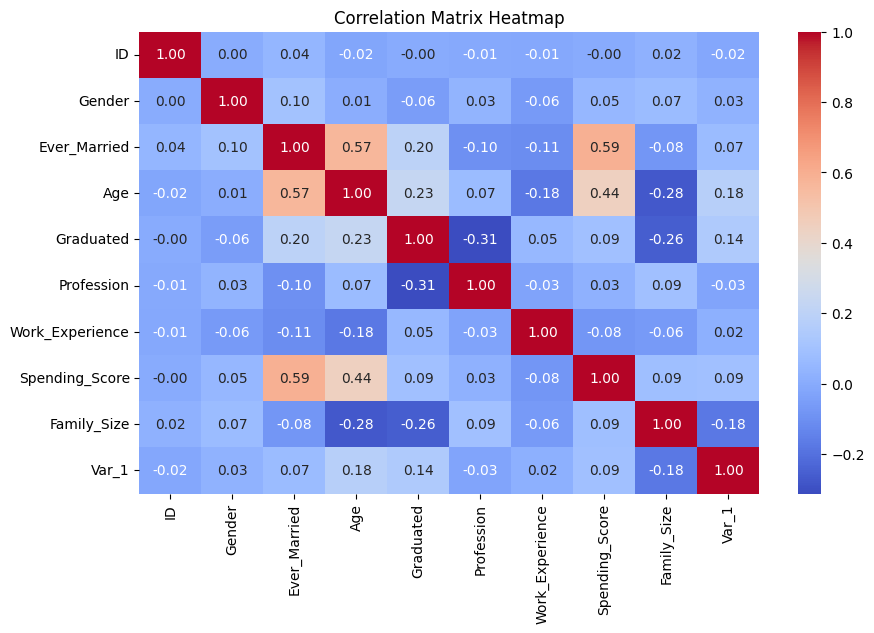

In [86]:
corr_matrix = dfe.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [87]:
# Now we drop the columns that we will not be using in the model.
dfe = dfe.drop(columns=['ID', 'Var_1', 'Profession',])
dfe.head(20)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,0.0,0,1.0
1,1,1,37,1,8.0,1,4.0
2,0,1,69,0,0.0,0,1.0
3,1,1,59,0,11.0,2,2.0
4,0,0,19,0,1.0,0,4.0
5,1,1,47,1,0.0,2,5.0
6,1,1,61,1,5.0,0,3.0
7,0,1,47,1,1.0,1,3.0
8,1,1,50,1,2.0,1,4.0
9,1,0,19,0,0.0,0,4.0


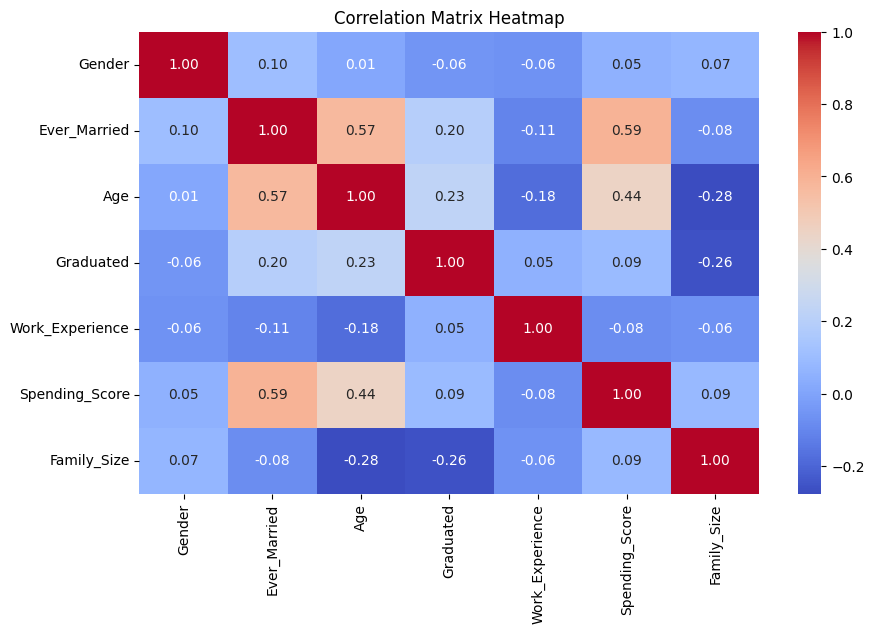

In [88]:
corr_matrix = dfe.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   int64  
 1   Ever_Married     2627 non-null   int64  
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   int64  
 4   Work_Experience  2627 non-null   float64
 5   Spending_Score   2627 non-null   int64  
 6   Family_Size      2627 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 143.8 KB


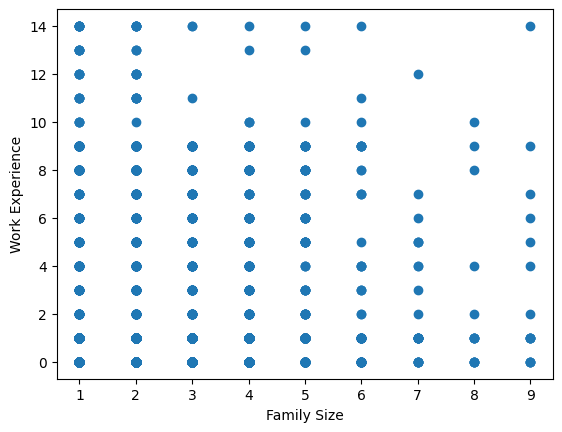

In [102]:
plt.scatter(dfe['Family_Size'], dfe['Work_Experience'])
plt.xlabel('Family Size')
plt.ylabel('Work Experience')
plt.show()

In [103]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfe[['Family_Size', 'Work_Experience']])
    sse.append(km.inertia_)

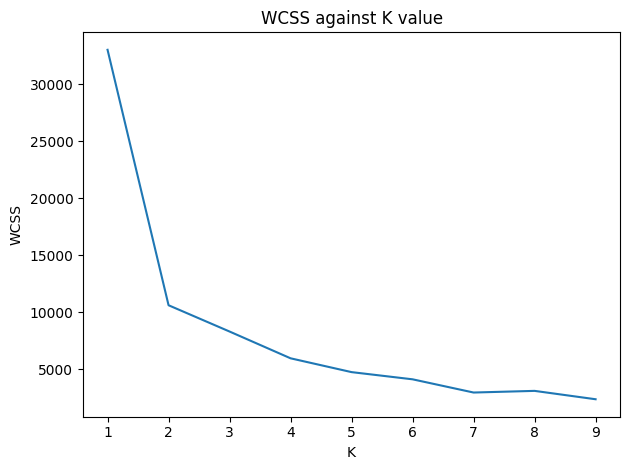

In [104]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [105]:
kneedle = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(f"Optimal k (Elbow Point): {kneedle.elbow}")

Optimal k (Elbow Point): 2


In [106]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(dfe[['Family_Size', 'Work_Experience']])
y_predicted

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [107]:
dfe['Cluster'] = y_predicted

dfe

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,1,36,1,0.0,0,1.0,0
1,1,1,37,1,8.0,1,4.0,1
2,0,1,69,0,0.0,0,1.0,0
3,1,1,59,0,11.0,2,2.0,1
4,0,0,19,0,1.0,0,4.0,0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.0,0,4.0,1
2623,0,0,35,1,1.0,0,1.0,0
2624,0,0,53,1,1.0,0,2.0,0
2625,1,1,47,1,1.0,2,5.0,0


In [108]:
km.cluster_centers_

array([[2.82730342, 0.88470815],
       [2.64981949, 8.03971119]])

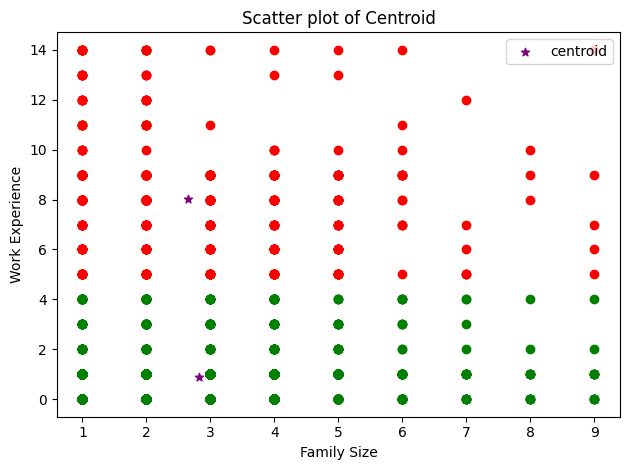

In [109]:
df1 = dfe[dfe.Cluster==0]
df2 = dfe[dfe.Cluster==1]
#df3 = dfe[dfe.Cluster==2]
#df4 = dfe[dfe.Cluster==3]

plt.scatter(df1['Family_Size'], df1['Work_Experience'], color = 'green')
plt.scatter(df2['Family_Size'], df2['Work_Experience'], color = 'red')
#plt.scatter(df3['Family_Size'], df3['Work_Experience'], color = 'black')
#plt.scatter(df4['Family_Size'], df4['Work_Experience'], color = 'blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Family Size')
plt.ylabel('Work Experience')
plt.legend()
plt.title('Scatter plot of Centroid')
plt.tight_layout()

In [32]:
sil_score = silhouette_score(dfe[['Family_Size', 'Work_Experience']], dfe['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6727168309889462


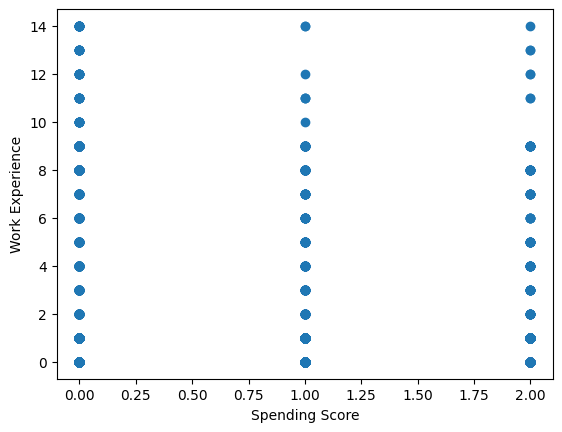

In [33]:
plt.scatter(dfe['Spending_Score'], dfe['Work_Experience'])
plt.xlabel('Spending Score')
plt.ylabel('Work Experience')
plt.show()

In [34]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfe[['Spending_Score', 'Work_Experience']])
    sse.append(km.inertia_)

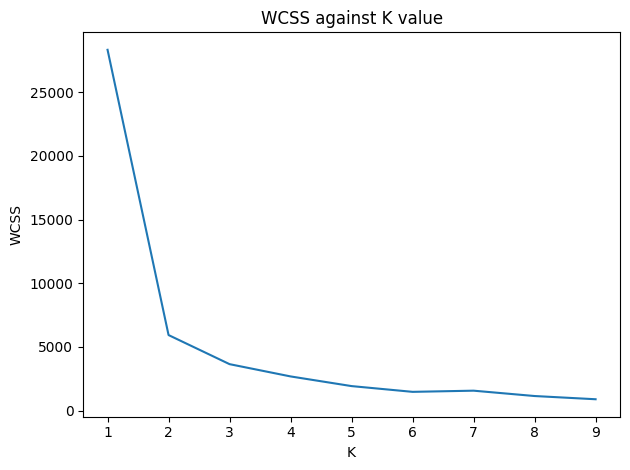

In [35]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [36]:
kneedle = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(f"Optimal k (Elbow Point): {kneedle.elbow}")

Optimal k (Elbow Point): 2


In [37]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(dfe[['Spending_Score', 'Work_Experience']])
y_predicted

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [38]:
dfe['Cluster'] = y_predicted

dfe

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,1,36,1,0.0,0,1.0,0
1,1,1,37,1,8.0,1,4.0,1
2,0,1,69,0,0.0,0,1.0,0
3,1,1,59,0,11.0,2,2.0,1
4,0,0,19,0,1.0,0,4.0,0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.0,0,4.0,1
2623,0,0,35,1,1.0,0,1.0,0
2624,0,0,53,1,1.0,0,2.0,0
2625,1,1,47,1,1.0,2,5.0,0


In [39]:
km.cluster_centers_

array([[0.56054028, 0.88470815],
       [0.42418773, 8.03971119]])

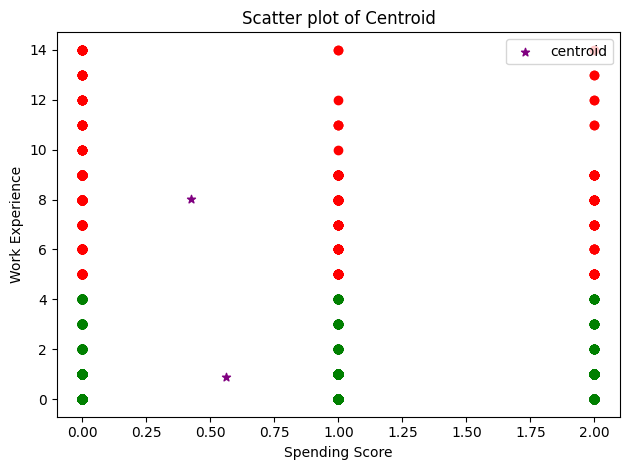

In [40]:
df1 = dfe[dfe.Cluster==0]
df2 = dfe[dfe.Cluster==1]


plt.scatter(df1['Spending_Score'], df1['Work_Experience'], color = 'green')
plt.scatter(df2['Spending_Score'], df2['Work_Experience'], color = 'red')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Spending Score')
plt.ylabel('Work Experience')
plt.legend()
plt.title('Scatter plot of Centroid')
plt.tight_layout()

In [41]:
sil_score = silhouette_score(dfe[['Spending_Score', 'Work_Experience']], dfe['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.7526316002319262


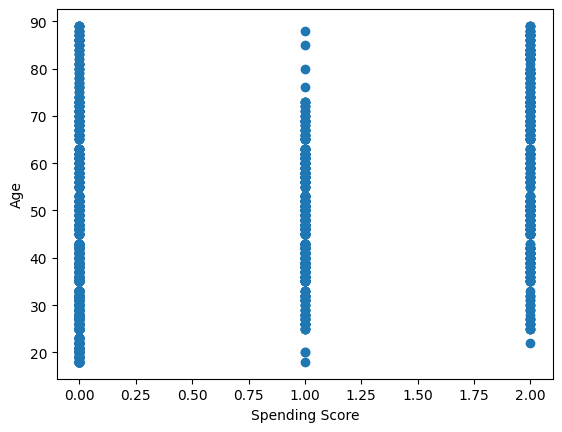

In [42]:
plt.scatter(dfe['Spending_Score'], dfe['Age'])
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

In [60]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfe[['Spending_Score', 'Age']])
    sse.append(km.inertia_)

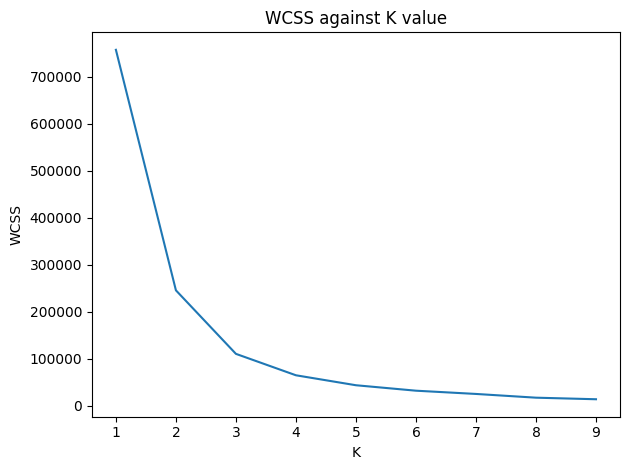

In [61]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [62]:
kneedle = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(f"Optimal k (Elbow Point): {kneedle.elbow}")

Optimal k (Elbow Point): 3


In [63]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfe[['Spending_Score', 'Age']])
y_predicted

array([0, 0, 1, ..., 2, 2, 2], dtype=int32)

In [64]:
dfe['Cluster'] = y_predicted

dfe

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,1,36,1,0.0,0,1.0,0
1,1,1,37,1,8.0,1,4.0,0
2,0,1,69,0,0.0,0,1.0,1
3,1,1,59,0,11.0,2,2.0,2
4,0,0,19,0,1.0,0,4.0,0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.0,0,4.0,0
2623,0,0,35,1,1.0,0,1.0,0
2624,0,0,53,1,1.0,0,2.0,2
2625,1,1,47,1,1.0,2,5.0,2


In [65]:
km.cluster_centers_

array([[ 0.19127205, 28.26462396],
       [ 1.00411523, 71.75102881],
       [ 0.66071429, 46.38721805]])

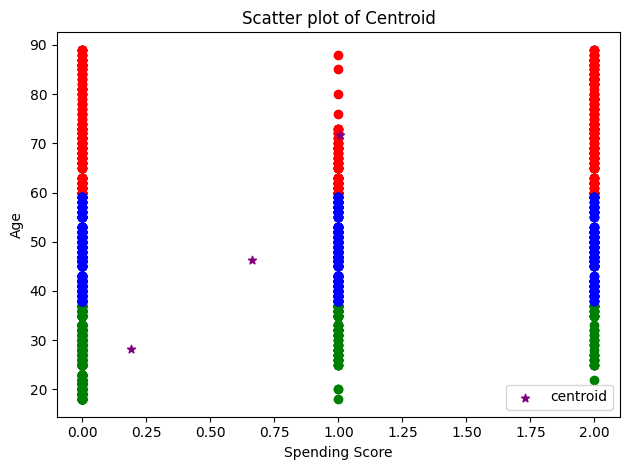

In [66]:
df1 = dfe[dfe.Cluster==0]
df2 = dfe[dfe.Cluster==1]
df3 = dfe[dfe.Cluster==2]


plt.scatter(df1['Spending_Score'], df1['Age'], color = 'green')
plt.scatter(df2['Spending_Score'], df2['Age'], color = 'red')
plt.scatter(df3['Spending_Score'], df3['Age'], color = 'blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.legend()
plt.title('Scatter plot of Centroid')
plt.tight_layout()

In [67]:
sil_score = silhouette_score(dfe[['Spending_Score', 'Age']], dfe['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5620601269938189


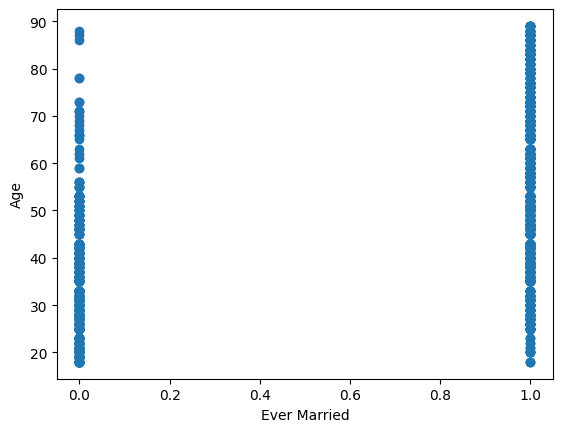

In [ ]:
plt.scatter(dfe['Ever_Married'], dfe['Age'])
plt.xlabel('Ever Married')
plt.ylabel('Age')
plt.show()

In [90]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfe[['Ever_Married', 'Age']])
    sse.append(km.inertia_)

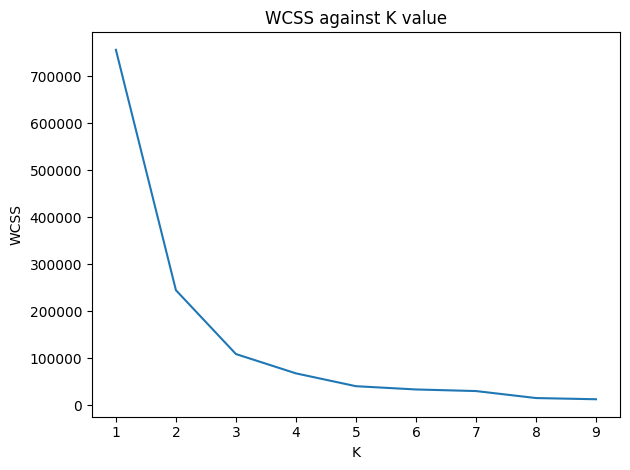

In [91]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [92]:
kneedle = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(f"Optimal k (Elbow Point): {kneedle.elbow}")

Optimal k (Elbow Point): 3


In [96]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfe[['Ever_Married', 'Age']])
y_predicted

array([0, 0, 2, ..., 0, 0, 0], dtype=int32)

In [97]:
dfe['Cluster'] = y_predicted

dfe

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,1,36,1,0.0,0,1.0,0
1,1,1,37,1,8.0,1,4.0,0
2,0,1,69,0,0.0,0,1.0,2
3,1,1,59,0,11.0,2,2.0,2
4,0,0,19,0,1.0,0,4.0,1
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.0,0,4.0,1
2623,0,0,35,1,1.0,0,1.0,1
2624,0,0,53,1,1.0,0,2.0,0
2625,1,1,47,1,1.0,2,5.0,0


In [98]:
km.cluster_centers_

array([[ 0.73519164, 44.62630662],
       [ 0.22257721, 27.05324814],
       [ 0.95740741, 70.43333333]])

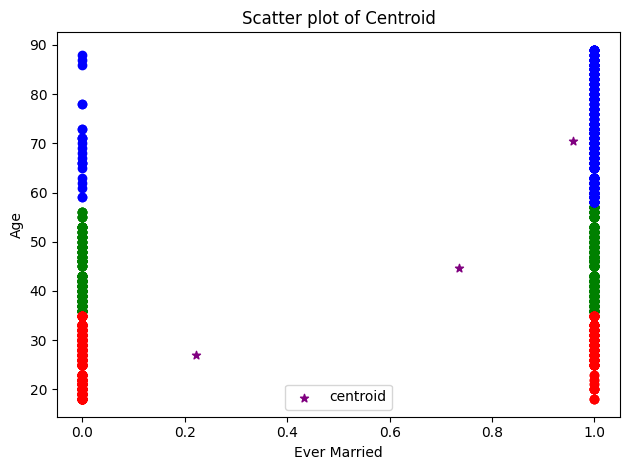

In [ ]:
df1 = dfe[dfe.Cluster==0]
df2 = dfe[dfe.Cluster==1]
df3 = dfe[dfe.Cluster==2]


plt.scatter(df1['Ever_Married'], df1['Age'], color = 'green')
plt.scatter(df2['Ever_Married'], df2['Age'], color = 'red')
plt.scatter(df3['Ever_Married'], df3['Age'], color = 'blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Ever Married')
plt.ylabel('Age')
plt.legend()
plt.title('Scatter plot of C    entroid')
plt.tight_layout()

In [101]:
sil_score = silhouette_score(dfe[['Ever_Married', 'Age']], dfe['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5737882180909987


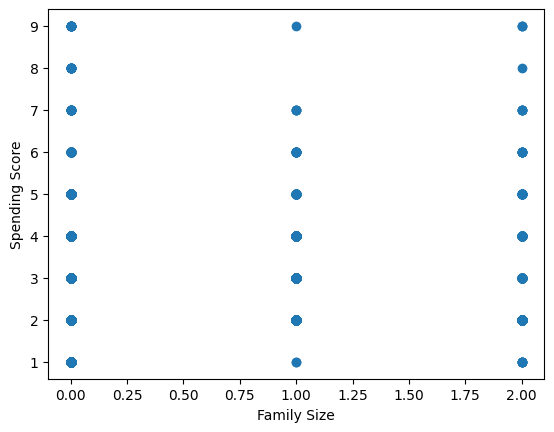

In [133]:
plt.scatter(dfe['Spending_Score'], dfe['Family_Size'])
plt.xlabel('Family Size')
plt.ylabel('Spending Score')
plt.show()

In [134]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfe[['Spending_Score', 'Family_Size']])
    sse.append(km.inertia_)

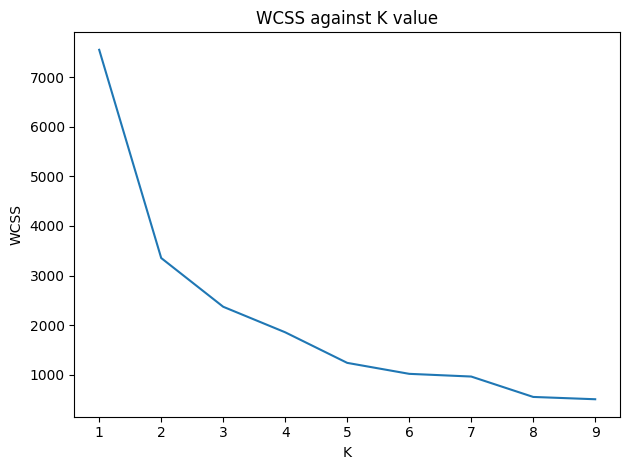

In [135]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [136]:
kneedle = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(f"Optimal k (Elbow Point): {kneedle.elbow}")

Optimal k (Elbow Point): 3


In [139]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfe[['Spending_Score', 'Family_Size']])
y_predicted

array([2, 0, 2, ..., 2, 1, 0], dtype=int32)

In [140]:
dfe['Cluster'] = y_predicted

dfe

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,1,36,1,0.0,0,1.0,2
1,1,1,37,1,8.0,1,4.0,0
2,0,1,69,0,0.0,0,1.0,2
3,1,1,59,0,11.0,2,2.0,2
4,0,0,19,0,1.0,0,4.0,0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.0,0,4.0,0
2623,0,0,35,1,1.0,0,1.0,2
2624,0,0,53,1,1.0,0,2.0,2
2625,1,1,47,1,1.0,2,5.0,1


In [141]:
km.cluster_centers_

array([[0.59288098, 3.49388209],
       [0.48059701, 5.71343284],
       [0.50466619, 1.63244795]])

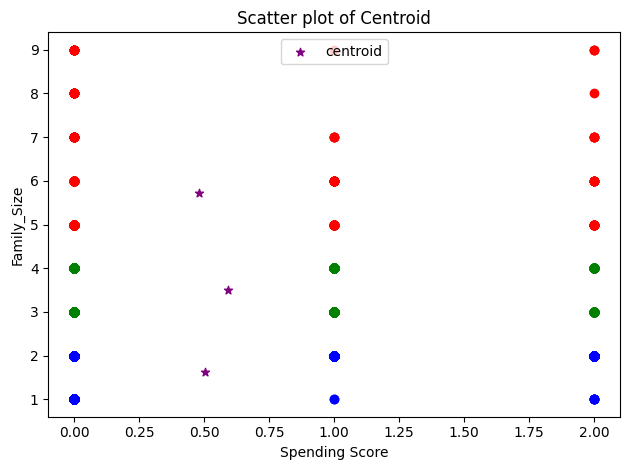

In [142]:
df1 = dfe[dfe.Cluster==0]
df2 = dfe[dfe.Cluster==1]
df3 = dfe[dfe.Cluster==2]
#df4 = dfe[dfe.Cluster==3]


plt.scatter(df1['Spending_Score'], df1['Family_Size'], color = 'green')
plt.scatter(df2['Spending_Score'], df2['Family_Size'], color = 'red')
plt.scatter(df3['Spending_Score'], df3['Family_Size'], color = 'blue')
#plt.scatter(df4['Family_Size'], df4['Spending_Score'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Spending Score')
plt.ylabel('Family_Size')
plt.legend()
plt.title('Scatter plot of Centroid')
plt.tight_layout()

In [144]:
sil_score = silhouette_score(dfe[['Spending_Score', 'Family_Size']], dfe['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.46770999945188024


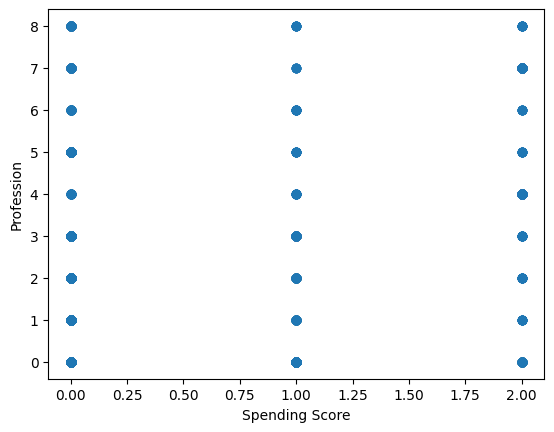

In [ ]:
plt.scatter(dfe['Spending_Score'], dfe['Profession'])
plt.xlabel('Spending Score')
plt.ylabel('Profession')
plt.show()

In [ ]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfe[['Spending_Score', 'Profession']])
    sse.append(km.inertia_)

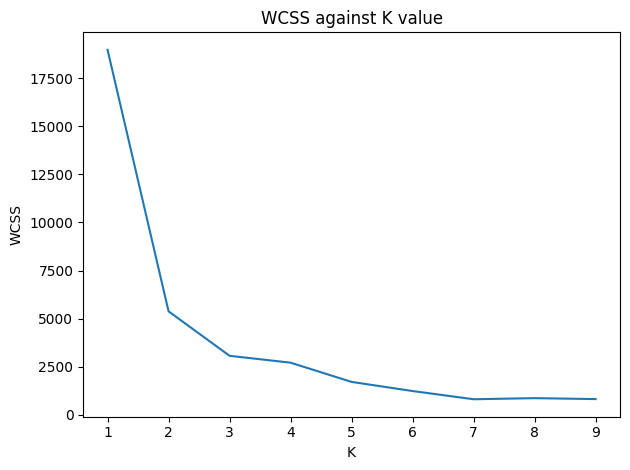

In [ ]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [ ]:
kneedle = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
print(f"Optimal k (Elbow Point): {kneedle.elbow}")

Optimal k (Elbow Point): 3


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfe[['Spending_Score', 'Profession']])
y_predicted

array([0, 2, 1, ..., 0, 0, 2], dtype=int32)

In [ ]:
dfe['Cluster'] = y_predicted

dfe

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,458989,0,1,36,1,2,0.0,0,1.0,5,0
1,458994,1,1,37,1,5,8.0,1,4.0,5,2
2,458996,0,1,69,0,0,0.0,0,1.0,5,1
3,459000,1,1,59,0,4,11.0,2,2.0,5,0
4,459001,0,0,19,0,8,1.0,0,4.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,5,9.0,0,4.0,5,2
2623,467958,0,0,35,1,1,1.0,0,1.0,5,1
2624,467960,0,0,53,1,3,1.0,0,2.0,5,0
2625,467961,1,1,47,1,4,1.0,2,5.0,3,0


In [ ]:
km.cluster_centers_

array([[0.69565217, 2.91584853],
       [0.5194085 , 0.22365989],
       [0.40745192, 6.03004808]])

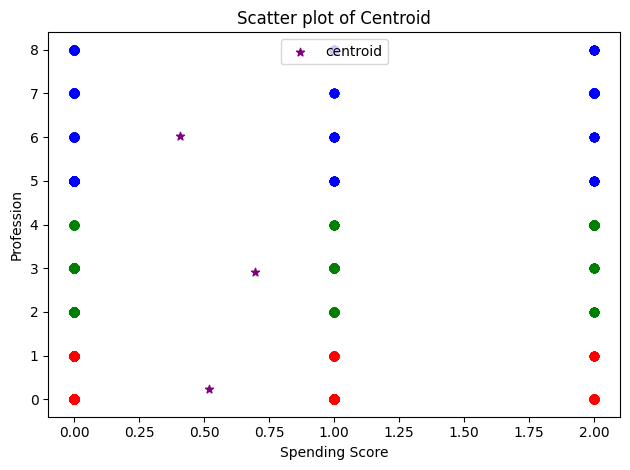

In [ ]:
df1 = dfe[dfe.Cluster==0]
df2 = dfe[dfe.Cluster==1]
df3 = dfe[dfe.Cluster==2]
#df4 = dfe[dfe.Cluster==3]
#df5 = dfe[dfe.Cluster==4]

plt.scatter(df1['Spending_Score'], df1['Profession'], color = 'green')
plt.scatter(df2['Spending_Score'], df2['Profession'], color = 'red')
plt.scatter(df3['Spending_Score'], df3['Profession'], color = 'blue')
#plt.scatter(df4['Spending_Score'], df4['Graduated'], color = 'black')
#plt.scatter(df5['Spending_Score'], df5['Graduated'], color = 'yellow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Spending Score')
plt.ylabel('Profession')
plt.legend()
plt.title('Scatter plot of Centroid')
plt.tight_layout()

In [ ]:
sil_score = silhouette_score(dfe[['Spending_Score', 'Profession']], dfe['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5693260602702106
